# Load packages

In [31]:
# import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import glob

# %load_ext autoreload
# %autoreload 2
import os
import random
import sqlite3 
import numpy as np
import json
import math
# from tqdm.notebook import tqdm
# from tqdm import tqdm
# tqdm.pandas()

# import jenkspy

# import Advan_operator as ad_op  
# import exposure_helper as helper

pd.set_option('display.max_columns', None)

# Set data directories

In [2]:
data_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Wild_fire\exposure'

# Load files

In [66]:
state_shp_fname = r'https://github.com/gladcolor/spatial_data/raw/master/cb_2019_us_state_20m.zip'
state_gdf = gpd.read_file(state_shp_fname)
state_gdf = state_gdf.rename(columns={"NAME":"state_name"})

state_gdf[['STATEFP', 'STUSPS', 'state_name']]

,STATEFP,STUSPS,state_name
0,53,WA,Washington
1,72,PR,Puerto Rico
2,46,SD,South Dakota
3,39,OH,Ohio
4,01,AL,Alabama
5,05,AR,Arkansas
6,35,NM,New Mexico
7,48,TX,Texas
8,06,CA,California
9,21,KY,Kentucky


In [3]:
exposure_files = glob.glob(os.path.join(data_dir, 'exposure*.csv.zip'))
print("Found file count:", len(exposure_files))
# exposure_files

Found file count: 719


In [4]:
exposure_df = pd.concat([pd.read_csv(f) for f in exposure_files])
exposure_df['date_time'] = pd.to_datetime(exposure_df['date_time'])
exposure_df

C:\Users\A\AppData\Local\Temp\ipykernel_3992\1721252382.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  exposure_df['date_time'] = pd.to_datetime(exposure_df['date_time'])


,xy_label,weighted_popu,ACS_weighted_popu,x,y,fused_data,MASSDEN,PM2_5_DRY_SFC,prediction,stations_interpolated,fused_data_exposure,ACS_fused_data_exposure,stations_interpolated_exposure,ACS_stations_interpolated_exposure,year,month,day,hour,date_time
0,1269_358,92.811240,100.918302,1.269255e+06,3.581268e+05,10.486976,0.0,3.612596,12.201368,8.276950,973.309221,1058.327778,768.193978,835.295719,2023,6,1,1,2023-06-01 01:00:00+00:00
1,1269_361,92.811240,100.918302,1.269255e+06,3.610979e+05,11.964456,0.0,3.612596,12.201368,8.272281,1110.435967,1207.432544,767.760695,834.824588,2023,6,1,1,2023-06-01 01:00:00+00:00
2,1269_364,79.231112,85.823861,1.269255e+06,3.640691e+05,11.981960,0.0,3.733774,10.695792,8.269268,949.344037,1028.338100,655.183312,709.700525,2023,6,1,1,2023-06-01 01:00:00+00:00
3,1269_367,48.406282,50.936750,1.269255e+06,3.670402e+05,11.474331,0.0,3.733774,10.695792,8.268017,555.429692,584.465129,400.223947,421.145906,2023,6,1,1,2023-06-01 01:00:00+00:00
4,1269_370,48.406282,50.936750,1.269255e+06,3.700113e+05,11.240396,0.0,3.733774,10.593472,8.268640,544.105797,572.549271,400.254102,421.177638,2023,6,1,1,2023-06-01 01:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52586,2255_1160,13.443454,15.249024,2.255669e+06,1.160330e+06,27.434345,0.0,0.586093,3.070646,14.794029,368.812354,418.346984,198.882842,225.594496,2023,6,30,23,2023-06-30 23:00:00+00:00
52587,2255_1163,35.348288,40.095863,2.255669e+06,1.163302e+06,27.426708,0.0,0.586093,3.070646,15.072925,969.487187,1099.697546,532.802096,604.361940,2023,6,30,23,2023-06-30 23:00:00+00:00
52588,2255_1166,37.099474,42.082249,2.255669e+06,1.166273e+06,27.494032,0.0,0.709779,3.070646,15.354659,1020.014134,1157.010691,569.649786,646.158589,2023,6,30,23,2023-06-30 23:00:00+00:00
52589,2255_1169,89.808680,80.928641,2.255669e+06,1.169244e+06,27.654919,0.0,0.693913,3.070646,15.638247,2483.651732,2238.074996,1404.450345,1265.582110,2023,6,30,23,2023-06-30 23:00:00+00:00


# Entire study areas

In [21]:
group_sum = exposure_df.groupby('date_time')[['fused_data_exposure', 
                                  'ACS_fused_data_exposure', 
                                  'stations_interpolated_exposure', 
                                  'ACS_stations_interpolated_exposure']].sum()

<Axes: xlabel='date_time'>

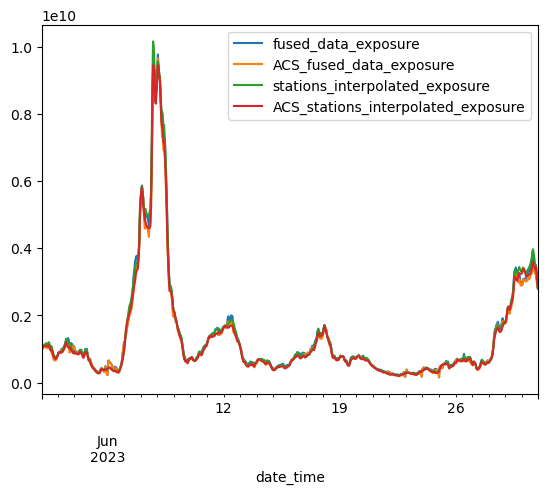

In [22]:
group_sum.plot()

# County level

In [63]:
grid_to_county_mapping_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\vectors\target_grid.shp"
print("loading grid to county mapping file form:", grid_to_county_mapping_fname)

grid_county_gdf = gpd.read_file(grid_to_county_mapping_fname )
grid_county_gdf[['xy_label', 'GEOID', 'NAME']]

loading grid to county mapping file form: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\vectors\target_grid.shp


,xy_label,GEOID,NAME
0,1269_607,42049,Erie
1,1269_604,42049,Erie
2,1269_601,42049,Erie
3,1269_598,39007,Ashtabula
4,1269_595,39007,Ashtabula
...,...,...,...
53556,2255_1169,None,None
53557,2255_1166,23029,Washington
53558,2255_1163,23029,Washington
53559,2255_1160,23029,Washington


<Axes: >

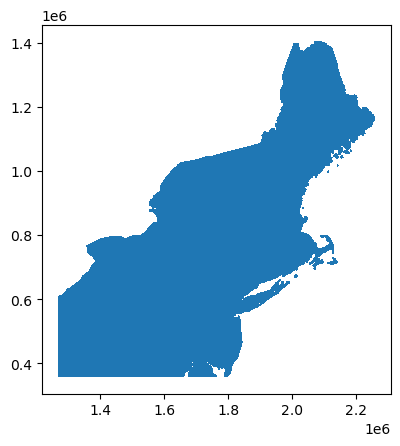

In [36]:
grid_county_gdf.plot()

In [41]:
exposure_df

,xy_label,weighted_popu,ACS_weighted_popu,x,y,fused_data,MASSDEN,PM2_5_DRY_SFC,prediction,stations_interpolated,fused_data_exposure,ACS_fused_data_exposure,stations_interpolated_exposure,ACS_stations_interpolated_exposure,year,month,day,hour,date_time
0,1269_358,92.811240,100.918302,1.269255e+06,3.581268e+05,10.486976,0.0,3.612596,12.201368,8.276950,973.309221,1058.327778,768.193978,835.295719,2023,6,1,1,2023-06-01 01:00:00+00:00
1,1269_361,92.811240,100.918302,1.269255e+06,3.610979e+05,11.964456,0.0,3.612596,12.201368,8.272281,1110.435967,1207.432544,767.760695,834.824588,2023,6,1,1,2023-06-01 01:00:00+00:00
2,1269_364,79.231112,85.823861,1.269255e+06,3.640691e+05,11.981960,0.0,3.733774,10.695792,8.269268,949.344037,1028.338100,655.183312,709.700525,2023,6,1,1,2023-06-01 01:00:00+00:00
3,1269_367,48.406282,50.936750,1.269255e+06,3.670402e+05,11.474331,0.0,3.733774,10.695792,8.268017,555.429692,584.465129,400.223947,421.145906,2023,6,1,1,2023-06-01 01:00:00+00:00
4,1269_370,48.406282,50.936750,1.269255e+06,3.700113e+05,11.240396,0.0,3.733774,10.593472,8.268640,544.105797,572.549271,400.254102,421.177638,2023,6,1,1,2023-06-01 01:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52586,2255_1160,13.443454,15.249024,2.255669e+06,1.160330e+06,27.434345,0.0,0.586093,3.070646,14.794029,368.812354,418.346984,198.882842,225.594496,2023,6,30,23,2023-06-30 23:00:00+00:00
52587,2255_1163,35.348288,40.095863,2.255669e+06,1.163302e+06,27.426708,0.0,0.586093,3.070646,15.072925,969.487187,1099.697546,532.802096,604.361940,2023,6,30,23,2023-06-30 23:00:00+00:00
52588,2255_1166,37.099474,42.082249,2.255669e+06,1.166273e+06,27.494032,0.0,0.709779,3.070646,15.354659,1020.014134,1157.010691,569.649786,646.158589,2023,6,30,23,2023-06-30 23:00:00+00:00
52589,2255_1169,89.808680,80.928641,2.255669e+06,1.169244e+06,27.654919,0.0,0.693913,3.070646,15.638247,2483.651732,2238.074996,1404.450345,1265.582110,2023,6,30,23,2023-06-30 23:00:00+00:00


In [42]:
exposure_county_df = exposure_df.merge(grid_county_gdf[['xy_label', 'GEOID', 'NAME']], left_on='xy_label', right_on='xy_label')
exposure_county_df

,xy_label,weighted_popu,ACS_weighted_popu,x,y,fused_data,MASSDEN,PM2_5_DRY_SFC,prediction,stations_interpolated,fused_data_exposure,ACS_fused_data_exposure,stations_interpolated_exposure,ACS_stations_interpolated_exposure,year,month,day,hour,date_time,GEOID,NAME
0,1269_358,92.811240,100.918302,1.269255e+06,3.581268e+05,10.486976,0.0,3.612596,12.201368,8.276950,973.309221,1058.327778,768.193978,835.295719,2023,6,1,1,2023-06-01 01:00:00+00:00,39111,Monroe
1,1269_358,93.677084,100.918302,1.269255e+06,3.581268e+05,9.898472,0.0,3.757228,11.162226,8.677151,927.259981,998.936970,812.850214,875.683354,2023,6,1,2,2023-06-01 02:00:00+00:00,39111,Monroe
2,1269_358,93.453873,100.918302,1.269255e+06,3.581268e+05,11.101686,0.0,4.073213,10.157770,9.445171,1037.495595,1120.363349,882.687851,953.190666,2023,6,1,3,2023-06-01 03:00:00+00:00,39111,Monroe
3,1269_358,91.854055,100.918302,1.269255e+06,3.581268e+05,12.326789,0.0,4.262328,8.196183,10.179861,1132.265543,1243.998605,935.061485,1027.334260,2023,6,1,4,2023-06-01 04:00:00+00:00,39111,Monroe
4,1269_358,88.272438,100.918302,1.269255e+06,3.581268e+05,11.844481,0.0,4.072906,8.307307,10.878913,1045.541256,1195.324958,960.308205,1097.881464,2023,6,1,5,2023-06-01 05:00:00+00:00,39111,Monroe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37812924,2255_1172,0.001207,0.000805,2.255669e+06,1.172215e+06,21.134411,0.0,0.658506,3.656229,17.590072,0.025499,0.017005,0.021223,0.014153,2023,6,30,19,2023-06-30 19:00:00+00:00,None,None
37812925,2255_1172,0.001317,0.000805,2.255669e+06,1.172215e+06,20.348957,0.0,0.624303,3.435581,17.853620,0.026791,0.016373,0.023505,0.014365,2023,6,30,20,2023-06-30 20:00:00+00:00,None,None
37812926,2255_1172,0.001411,0.000805,2.255669e+06,1.172215e+06,22.003407,0.0,0.616643,3.151258,17.034536,0.031045,0.017704,0.024034,0.013706,2023,6,30,21,2023-06-30 21:00:00+00:00,None,None
37812927,2255_1172,0.000663,0.000805,2.255669e+06,1.172215e+06,26.192684,0.0,0.588941,3.108058,16.487381,0.017366,0.021075,0.010931,0.013266,2023,6,30,22,2023-06-30 22:00:00+00:00,None,None


Processing 1 / 255: Monroe, OH
Processing 2 / 255: Belmont, OH
Processing 3 / 255: Harrison, OH
Processing 4 / 255: Jefferson, OH
Processing 5 / 255: Columbiana, OH
Processing 6 / 255: Mahoning, OH
Processing 7 / 255: Trumbull, OH
Processing 8 / 255: Ashtabula, OH
Processing 9 / 255: Erie, PA
Processing 10 / 255: Crawford, PA
Processing 11 / 255: Mercer, PA
Processing 12 / 255: Marshall, WV
Processing 13 / 255: Hancock, WV
Processing 14 / 255: Lawrence, PA
Processing 15 / 255: Ohio, WV
Processing 16 / 255: Brooke, WV
Processing 17 / 255: Beaver, PA
Processing 18 / 255: Washington, PA
Processing 19 / 255: Greene, PA
Processing 20 / 255: Allegheny, PA
Processing 21 / 255: Butler, PA
Processing 22 / 255: Venango, PA
Processing 23 / 255: Monongalia, WV
Processing 24 / 255: Chautauqua, NY
Processing 25 / 255: Warren, PA
Processing 26 / 255: Fayette, PA
Processing 27 / 255: Armstrong, PA
Processing 28 / 255: Clarion, PA
Processing 29 / 255: Westmoreland, PA
Processing 30 / 255: Forest, PA
si

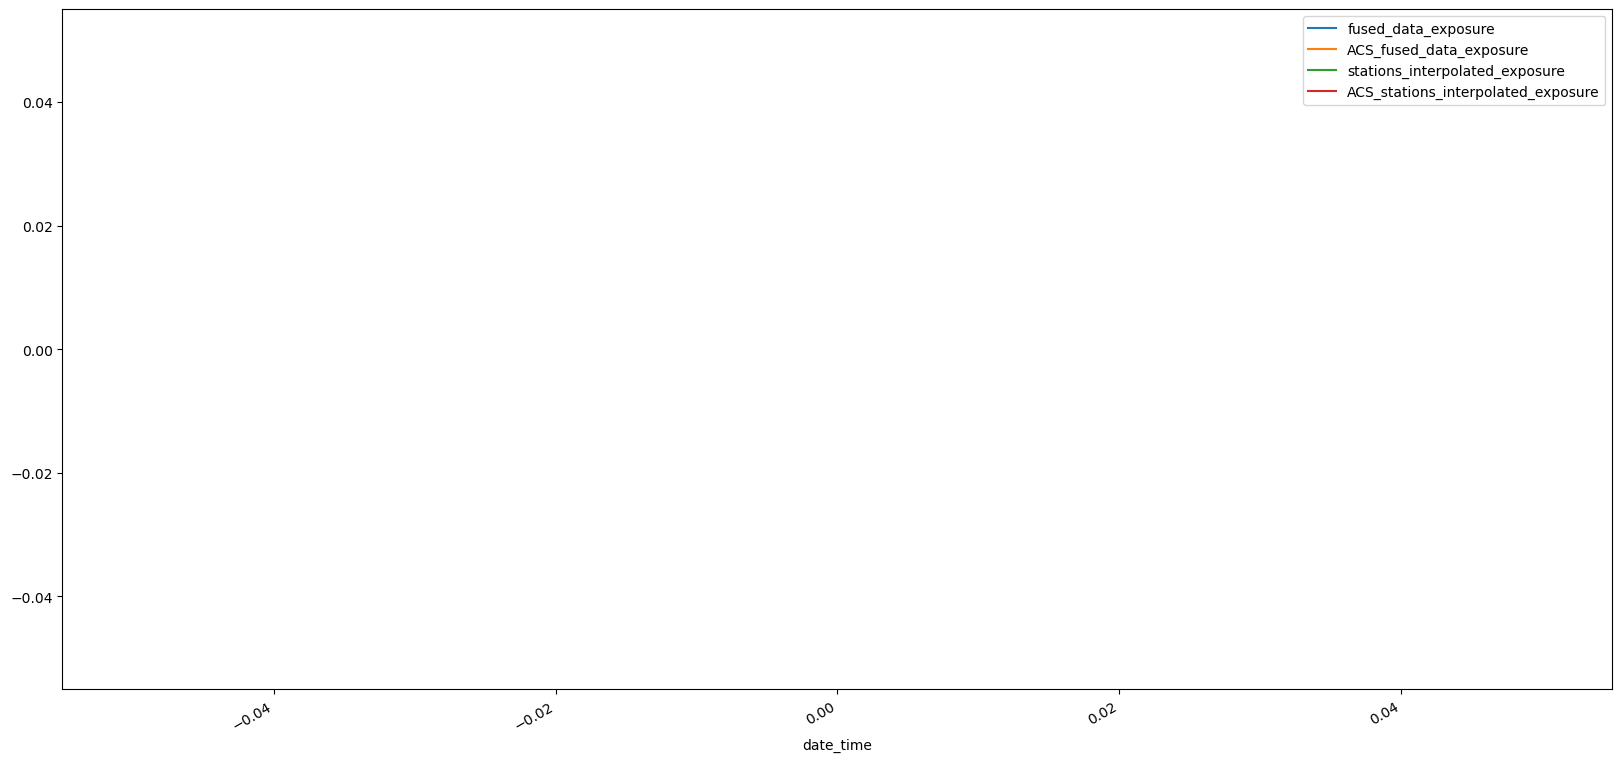

In [96]:
save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Wild_fire\exposure\visualization_county'

county_FIPSs = exposure_county_df['GEOID'].unique()
# county_FIPSs = sorted(county_FIPSs)

for idx, county_FIPS in enumerate(county_FIPSs):
    try:
        df = exposure_county_df.query(f"GEOID == '{county_FIPS}' ").copy()
        df['state_FIPS'] = df['GEOID'].str[:2]
        df = df.merge(state_gdf[['STATEFP', 'STUSPS', 'state_name']], left_on='state_FIPS', right_on='STATEFP')
        group_sum = df.groupby('date_time')[['fused_data_exposure', 
                                      'ACS_fused_data_exposure', 
                                      'stations_interpolated_exposure', 
                                      'ACS_stations_interpolated_exposure']].sum()
    
        fig, ax = plt.subplots(figsize=(20, 10))
        group_sum.plot(ax=ax)
        title = df.iloc[0]['NAME'] + ', ' + df.iloc[0]['STUSPS']
        print(f"Processing {idx + 1} / {len(county_FIPSs)}: {title}")
        
        ax.set_title(title)
    
        fname = os.path.join(save_dir, f"{title}.png")
        plt.savefig(fname, bbox_inches='tight', pad_inches=0.2)
        plt.close()
    except Exception as e:
        print(e)
        continue
    # break

In [82]:
df.loc[:, 'state_FIPS'] = df['GEOID'].str[:2]#.to_list()
df = df.merge(state_gdf[['STATEFP', 'STUSPS', 'state_name']], left_on='state_FIPS', right_on='STATEFP')

C:\Users\A\AppData\Local\Temp\ipykernel_3992\560376409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'state_FIPS'] = df['GEOID'].str[:2]#.to_list()


In [81]:
df = exposure_county_df.query("NAME == 'New York' ")


In [84]:
df

,xy_label,weighted_popu,ACS_weighted_popu,x,y,fused_data,MASSDEN,PM2_5_DRY_SFC,prediction,stations_interpolated,fused_data_exposure,ACS_fused_data_exposure,stations_interpolated_exposure,ACS_stations_interpolated_exposure,year,month,day,hour,date_time,GEOID,NAME,state_FIPS,STATEFP,STUSPS,state_name
0,1824_569,207.629221,209.284794,1.824855e+06,569076.660171,16.179698,59.604645,10.357073,17.604462,17.429490,3.359378e+03,3.386165e+03,3.618871e+03,3.647727e+03,2023,6,1,1,2023-06-01 01:00:00+00:00,36061,New York,36,36,NY,New York
1,1824_569,198.582559,209.284794,1.824855e+06,569076.660171,16.247265,59.604645,9.708352,17.111018,18.793478,3.226424e+03,3.400306e+03,3.732057e+03,3.933189e+03,2023,6,1,2,2023-06-01 02:00:00+00:00,36061,New York,36,36,NY,New York
2,1824_569,190.839865,209.284794,1.824855e+06,569076.660171,16.633902,59.604645,9.711841,16.197189,16.556831,3.174412e+03,3.481223e+03,3.159703e+03,3.465093e+03,2023,6,1,3,2023-06-01 03:00:00+00:00,36061,New York,36,36,NY,New York
3,1824_569,228.054248,209.284794,1.824855e+06,569076.660171,15.149861,0.000000,11.598392,15.833117,16.212885,3.454990e+03,3.170636e+03,3.697417e+03,3.393110e+03,2023,6,1,4,2023-06-01 04:00:00+00:00,36061,New York,36,36,NY,New York
4,1824_569,277.178923,209.284794,1.824855e+06,569076.660171,17.370854,0.000000,12.299698,17.037343,14.819690,4.814835e+03,3.635456e+03,4.107706e+03,3.101536e+03,2023,6,1,5,2023-06-01 05:00:00+00:00,36061,New York,36,36,NY,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8623,1830_580,127884.903340,122427.599837,1.830798e+06,580961.158016,71.560019,0.000000,18.604456,79.059006,68.902325,9.151446e+06,8.760921e+06,8.811567e+06,8.435546e+06,2023,6,30,19,2023-06-30 19:00:00+00:00,36061,New York,36,36,NY,New York
8624,1830_580,125562.092993,122427.599837,1.830798e+06,580961.158016,68.330056,0.000000,19.164976,82.860625,81.335964,8.579665e+06,8.365485e+06,1.021271e+07,9.957767e+06,2023,6,30,20,2023-06-30 20:00:00+00:00,36061,New York,36,36,NY,New York
8625,1830_580,123247.195163,122427.599837,1.830798e+06,580961.158016,56.361323,0.000000,19.944267,71.531607,72.782235,6.946375e+06,6.900182e+06,8.970206e+06,8.910554e+06,2023,6,30,21,2023-06-30 21:00:00+00:00,36061,New York,36,36,NY,New York
8626,1830_580,126878.324342,122427.599837,1.830798e+06,580961.158016,50.938495,0.000000,20.474546,52.024126,50.444961,6.462991e+06,6.236278e+06,6.400372e+06,6.175856e+06,2023,6,30,22,2023-06-30 22:00:00+00:00,36061,New York,36,36,NY,New York


In [29]:
result = grouped.sort_values('sub_area', ascending=False).drop_duplicates(['xy_label'])
result

,xy_label,county_FIP,sub_area
2740,1340_462,42003,8.827597
39215,1827_536,34025,8.827597
17809,1593_471,42041,8.827596
17195,1584_720,36109,8.827596
52767,2009_702,44009,8.827596
...,...,...,...
51398,1994_1371,23003,0.000532
49018,1967_1216,23025,0.000185
56762,2059_1395,23003,0.000088
62195,2181_1237,23029,0.000078


In [12]:
grouped['xy_label'].nunique()

53411

In [ ]:
group_counties = exposure_df.groupby(['date_time', ''])[['fused_data_exposure', 
                                  'ACS_fused_data_exposure', 
                                  'stations_interpolated_exposure', 
                                  'ACS_stations_interpolated_exposure']].sum()